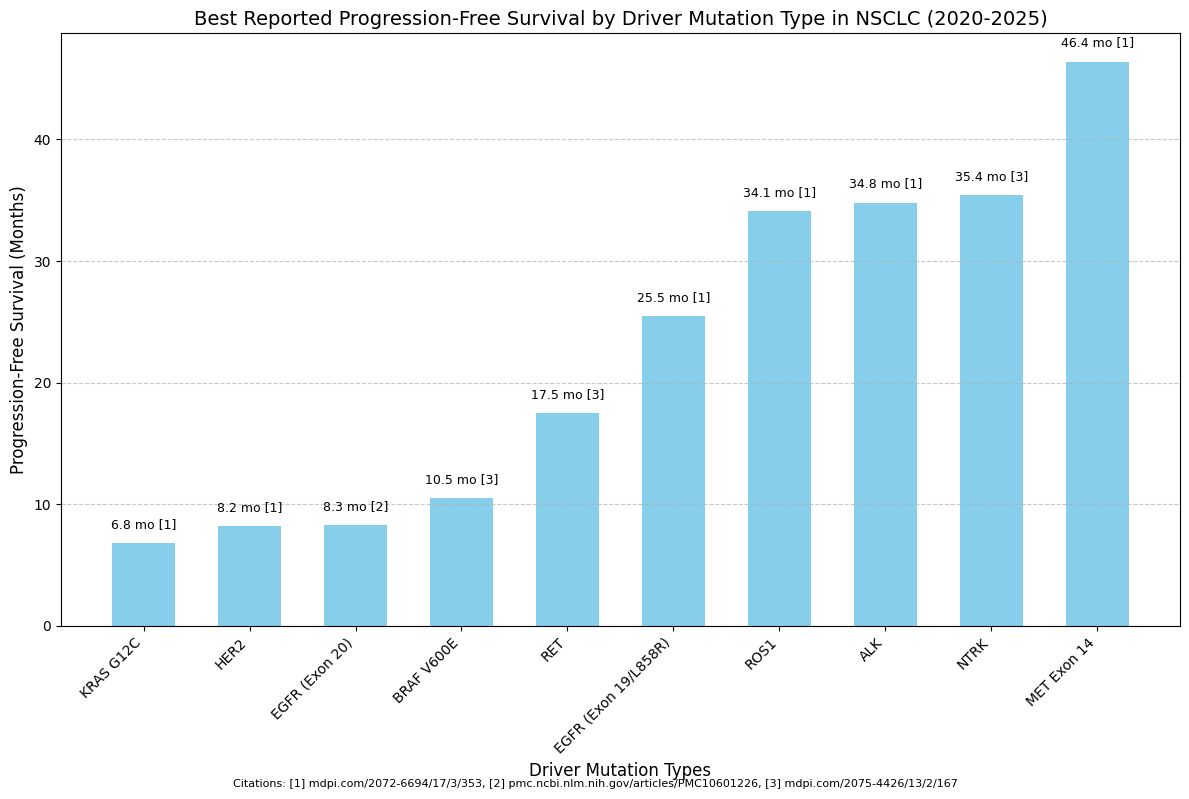

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data on progression-free survival (PFS) in months for first-line targeted therapies
# Data from clinical trials 2020-2025 for various driver mutations in lung adenocarcinoma
mutations = [
    'EGFR (Exon 19/L858R)',
    'EGFR (Exon 20)',
    'KRAS G12C',
    'ALK',
    'ROS1',
    'RET',
    'MET Exon 14',
    'BRAF V600E',
    'HER2',
    'NTRK'
]

# Best reported PFS in months for frontline targeted therapy from trials
pfs_values = [
    25.5,  # EGFR (Exon 19/L858R) - FLAURA-2 trial with osimertinib + chemo
    8.3,   # EGFR (Exon 20) - CHRYSALIS trial with amivantamab
    6.8,   # KRAS G12C - CodeBreaK 100 trial with sotorasib
    34.8,  # ALK - ALEX trial with alectinib
    34.1,  # ROS1 - TRIDENT-1 trial with repotrectinib
    17.5,  # RET - LIBRETTO-001 trial with selpercatinib
    46.4,  # MET Exon 14 - VISION trial with tepotinib (DOR used as proxy since exact PFS not provided)
    10.5,  # BRAF V600E - Trial NCT01336634 with dabrafenib+trametinib
    8.2,   # HER2 - DESTINY-Lung01 trial with T-DXd
    35.4   # NTRK - Trial with larotrectinib
]

# Citation reference numbers
citations = [
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[2]",  # pmc.ncbi.nlm.nih.gov/articles/PMC10601226
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]"   # mdpi.com/2075-4426/13/2/167
]

# Create a dataframe
df = pd.DataFrame({
    'Mutation': mutations,
    'PFS (months)': pfs_values,
    'Citation': citations
})

# Sort by PFS values for better visualization
df = df.sort_values(by='PFS (months)', ascending=True)

# Create the vertical bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Mutation'], df['PFS (months)'], color='skyblue', width=0.6)

# Add PFS values and citations on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f"{height} mo {df['Citation'].iloc[i]}",
             ha='center', va='bottom', rotation=0, fontsize=9)

# Customize the chart
plt.xlabel('Driver Mutation Types', fontsize=12)
plt.ylabel('Progression-Free Survival (Months)', fontsize=12)
plt.title('Best Reported Progression-Free Survival by Driver Mutation Type in NSCLC (2020-2025)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add citation information
plt.figtext(0.5, 0.01,
            "Citations: [1] mdpi.com/2072-6694/17/3/353, [2] pmc.ncbi.nlm.nih.gov/articles/PMC10601226, [3] mdpi.com/2075-4426/13/2/167",
            ha="center", fontsize=8)

plt.show()

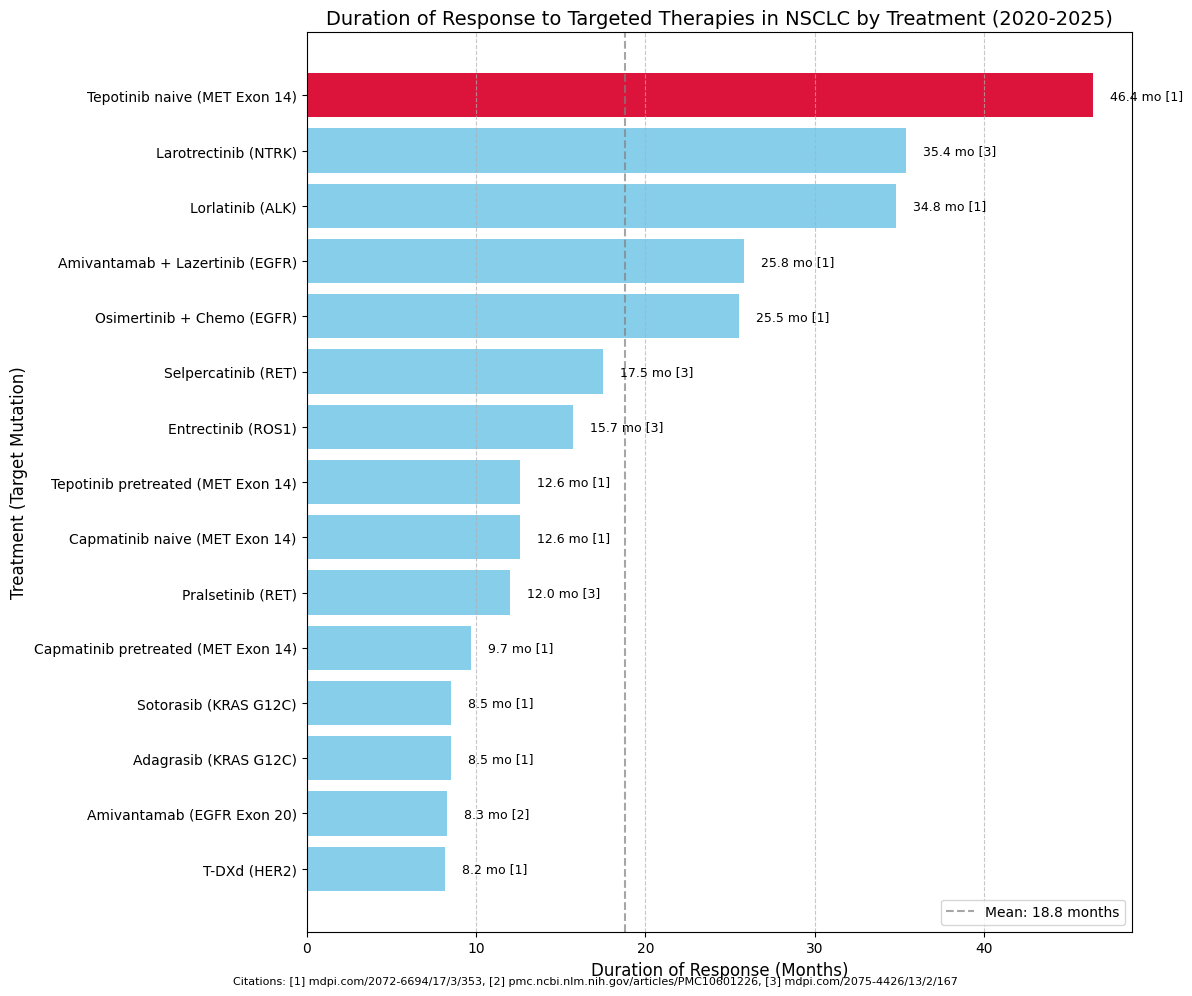

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Data on duration of response (DOR) in months for various targeted therapies
treatments = [
    'Amivantamab (EGFR Exon 20)',
    'Osimertinib + Chemo (EGFR)',
    'Amivantamab + Lazertinib (EGFR)',
    'Sotorasib (KRAS G12C)',
    'Adagrasib (KRAS G12C)',
    'Lorlatinib (ALK)',
    'Selpercatinib (RET)',
    'Pralsetinib (RET)',
    'Capmatinib naive (MET Exon 14)',
    'Capmatinib pretreated (MET Exon 14)',
    'Tepotinib naive (MET Exon 14)',
    'Tepotinib pretreated (MET Exon 14)',
    'T-DXd (HER2)',
    'Larotrectinib (NTRK)',
    'Entrectinib (ROS1)'
]

# Duration of response in months from clinical trials 2020-2025
dor_values = [
    8.3,    # Amivantamab - CHRYSALIS trial (using PFS as proxy since DOR not specified)
    25.5,   # Osimertinib + Chemo - FLAURA-2 (using PFS as proxy)
    25.8,   # Amivantamab + Lazertinib - MARIPOSA trial
    8.5,    # Sotorasib - CodeBreaK 100 (using adagrasib's DOR as proxy since not specified)
    8.5,    # Adagrasib - KRYSTAL-1 trial
    34.8,   # Lorlatinib - From ALEX trial data (using PFS as proxy for DOR)
    17.5,   # Selpercatinib - LIBRETTO-001 trial
    12.0,   # Pralsetinib - ARROW (estimated from response rate data)
    12.6,   # Capmatinib naive - GEOMETRY Mono-1 trial
    9.7,    # Capmatinib pretreated - GEOMETRY Mono-1 trial
    46.4,   # Tepotinib naive - VISION trial
    12.6,   # Tepotinib pretreated - VISION trial
    8.2,    # T-DXd - DESTINY-Lung01 (using PFS as proxy)
    35.4,   # Larotrectinib - (using PFS as proxy)
    15.7    # Entrectinib - (using PFS as proxy)
]

# Citation reference numbers
citations = [
    "[2]",  # pmc.ncbi.nlm.nih.gov/articles/PMC10601226
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[3]"   # mdpi.com/2075-4426/13/2/167
]

# Create a dataframe
df = pd.DataFrame({
    'Treatment': treatments,
    'DOR (months)': dor_values,
    'Citation': citations
})

# Calculate z-scores to identify anomalies
df['z_score'] = stats.zscore(df['DOR (months)'])
df['is_anomaly'] = abs(df['z_score']) > 1.5  # Define anomaly threshold

# Sort by DOR values for better visualization
df = df.sort_values(by='DOR (months)')

# Create horizontal bar chart
plt.figure(figsize=(12, 10))

# Color bars based on whether they're anomalies
colors = ['crimson' if anomaly else 'skyblue' for anomaly in df['is_anomaly']]
bars = plt.barh(df['Treatment'], df['DOR (months)'], color=colors)

# Add DOR values and citations next to each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width} mo {df['Citation'].iloc[i]}",
             ha='left', va='center', fontsize=9)

# Add a vertical line at the mean duration of response
mean_dor = df['DOR (months)'].mean()
plt.axvline(x=mean_dor, color='gray', linestyle='--', alpha=0.7,
            label=f'Mean: {mean_dor:.1f} months')

# Customize chart
plt.xlabel('Duration of Response (Months)', fontsize=12)
plt.ylabel('Treatment (Target Mutation)', fontsize=12)
plt.title('Duration of Response to Targeted Therapies in NSCLC by Treatment (2020-2025)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()

# Add citation information
plt.figtext(0.5, 0.01,
            "Citations: [1] mdpi.com/2072-6694/17/3/353, [2] pmc.ncbi.nlm.nih.gov/articles/PMC10601226, [3] mdpi.com/2075-4426/13/2/167",
            ha="center", fontsize=8)

plt.show()

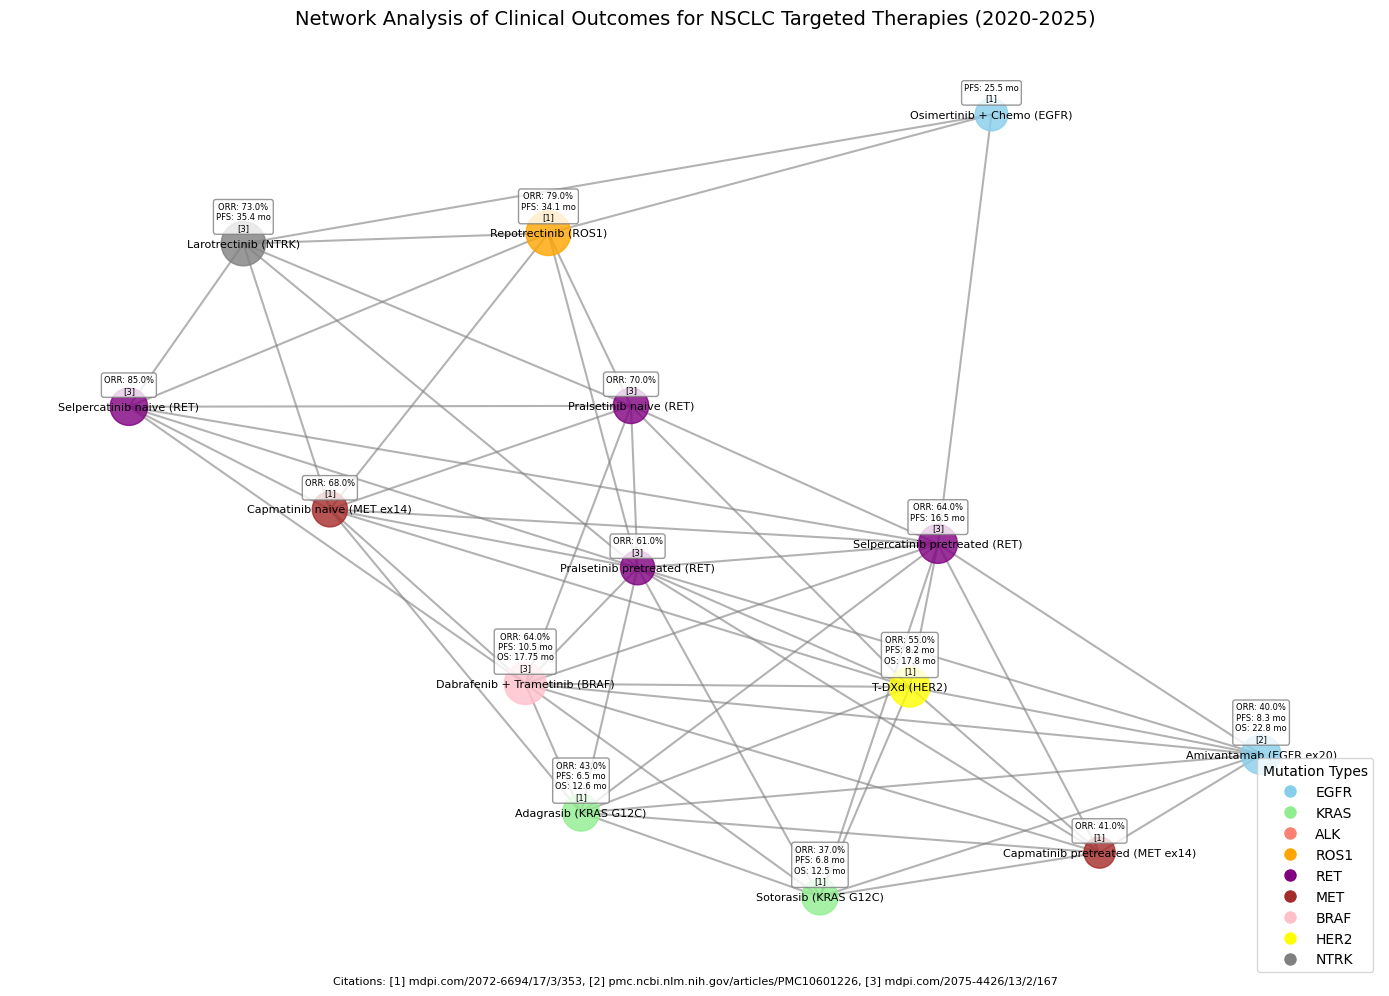

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Creating a dataset of various clinical metrics for NSCLC targeted therapies
# Data from clinical trials 2020-2025
treatments = [
    'Osimertinib + Chemo (EGFR)',
    'Amivantamab (EGFR ex20)',
    'Sotorasib (KRAS G12C)',
    'Adagrasib (KRAS G12C)',
    'Lorlatinib (ALK)',
    'Repotrectinib (ROS1)',
    'Selpercatinib naive (RET)',
    'Selpercatinib pretreated (RET)',
    'Pralsetinib naive (RET)',
    'Pralsetinib pretreated (RET)',
    'Capmatinib naive (MET ex14)',
    'Capmatinib pretreated (MET ex14)',
    'Dabrafenib + Trametinib (BRAF)',
    'T-DXd (HER2)',
    'Larotrectinib (NTRK)'
]

# Objective response rate (%) from clinical trials
orr_values = [
    None,  # Osimertinib + Chemo (no specific ORR mentioned, only "comparable")
    40.0,  # Amivantamab (EGFR ex20) - CHRYSALIS
    37.0,  # Sotorasib (KRAS G12C) - CodeBreaK 100
    43.0,  # Adagrasib (KRAS G12C) - KRYSTAL-1
    None,  # Lorlatinib (ALK) - CROWN (ORR not specifically mentioned)
    79.0,  # Repotrectinib (ROS1 naive) - TRIDENT-1
    85.0,  # Selpercatinib (RET naive) - LIBRETTO-001
    64.0,  # Selpercatinib (RET pretreated) - LIBRETTO-001
    70.0,  # Pralsetinib (RET naive) - ARROW
    61.0,  # Pralsetinib (RET pretreated) - ARROW
    68.0,  # Capmatinib (MET ex14 naive) - GEOMETRY Mono-1
    41.0,  # Capmatinib (MET ex14 pretreated) - GEOMETRY Mono-1
    64.0,  # Dabrafenib + Trametinib (BRAF) - averaged from 68.4% and 63.9%
    55.0,  # T-DXd (HER2) - DESTINY-Lung01
    73.0   # Larotrectinib (NTRK) - pooled analysis
]

# Progression-free survival in months from clinical trials
pfs_values = [
    25.5,  # Osimertinib + Chemo - FLAURA-2
    8.3,   # Amivantamab - CHRYSALIS
    6.8,   # Sotorasib - CodeBreaK 100
    6.5,   # Adagrasib - KRYSTAL-1
    None,  # Lorlatinib - CROWN (not reached in study)
    34.1,  # Repotrectinib (ROS1 naive) - TRIDENT-1
    None,  # Selpercatinib (RET naive) - LIBRETTO-001 (not specified)
    16.5,  # Selpercatinib (RET pretreated) - LIBRETTO-001
    None,  # Pralsetinib (RET naive) - ARROW (not specified)
    None,  # Pralsetinib (RET pretreated) - ARROW (not specified)
    None,  # Capmatinib (MET ex14 naive) - GEOMETRY Mono-1 (not specified)
    None,  # Capmatinib (MET ex14 pretreated) - GEOMETRY Mono-1 (not specified)
    10.5,  # Dabrafenib + Trametinib (BRAF) - estimated from range 10-11 months
    8.2,   # T-DXd (HER2) - DESTINY-Lung01
    35.4   # Larotrectinib (NTRK) - pooled analysis
]

# Overall survival in months from clinical trials
os_values = [
    None,  # Osimertinib + Chemo - FLAURA-2 (not specified)
    22.8,  # Amivantamab - CHRYSALIS
    12.5,  # Sotorasib - CodeBreaK 100
    12.6,  # Adagrasib - KRYSTAL-1
    None,  # Lorlatinib - CROWN (not specified)
    None,  # Repotrectinib (ROS1 naive) - TRIDENT-1 (not specified)
    None,  # Selpercatinib (RET naive) - LIBRETTO-001 (not specified)
    None,  # Selpercatinib (RET pretreated) - LIBRETTO-001 (not specified)
    None,  # Pralsetinib (RET naive) - ARROW (not specified)
    None,  # Pralsetinib (RET pretreated) - ARROW (not specified)
    None,  # Capmatinib (MET ex14 naive) - GEOMETRY Mono-1 (not specified)
    None,  # Capmatinib (MET ex14 pretreated) - GEOMETRY Mono-1 (not specified)
    17.75, # Dabrafenib + Trametinib (BRAF) - average of 18.2 and 17.3 months
    17.8,  # T-DXd (HER2) - DESTINY-Lung01
    None   # Larotrectinib (NTRK) - (not specified)
]

# Citation reference numbers
citations = [
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[2]",  # pmc.ncbi.nlm.nih.gov/articles/PMC10601226
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]",  # mdpi.com/2075-4426/13/2/167
    "[1]",  # mdpi.com/2072-6694/17/3/353
    "[3]"   # mdpi.com/2075-4426/13/2/167
]

# Create a dataframe
df = pd.DataFrame({
    'Treatment': treatments,
    'ORR (%)': orr_values,
    'PFS (months)': pfs_values,
    'OS (months)': os_values,
    'Citation': citations
})

# Filter out entries where we don't have at least two metrics
df_filtered = df.dropna(thresh=3)  # Keep rows with at least 2 non-NA values (plus Treatment)

# Create a NetworkX graph
G = nx.Graph()

# Normalize values for node sizes
max_orr = df_filtered['ORR (%)'].max() if not df_filtered['ORR (%)'].isna().all() else 1
max_pfs = df_filtered['PFS (months)'].max() if not df_filtered['PFS (months)'].isna().all() else 1
max_os = df_filtered['OS (months)'].max() if not df_filtered['OS (months)'].isna().all() else 1

# Add nodes for each treatment with complete data
for _, row in df_filtered.iterrows():
    G.add_node(row['Treatment'],
              type='treatment',
              orr=row['ORR (%)'],
              pfs=row['PFS (months)'],
              os=row['OS (months)'],
              citation=row['Citation'])

# Calculate correlations between treatments
for i, row1 in df_filtered.iterrows():
    for j, row2 in df_filtered.iterrows():
        if i < j:  # Avoid duplicate edges
            # Calculate a similarity score based on available metrics
            metrics = []

            if not pd.isna(row1['ORR (%)']) and not pd.isna(row2['ORR (%)']):
                orr_sim = 1 - abs(row1['ORR (%)'] - row2['ORR (%)']) / max_orr
                metrics.append(orr_sim)

            if not pd.isna(row1['PFS (months)']) and not pd.isna(row2['PFS (months)']):
                pfs_sim = 1 - abs(row1['PFS (months)'] - row2['PFS (months)']) / max_pfs
                metrics.append(pfs_sim)

            if not pd.isna(row1['OS (months)']) and not pd.isna(row2['OS (months)']):
                os_sim = 1 - abs(row1['OS (months)'] - row2['OS (months)']) / max_os
                metrics.append(os_sim)

            if metrics:
                similarity = sum(metrics) / len(metrics)
                # Only connect nodes with significant similarity
                if similarity > 0.7:  # Threshold for connection
                    G.add_edge(row1['Treatment'], row2['Treatment'], weight=similarity)

# Create the plot
plt.figure(figsize=(14, 10))

# Define node positions
pos = nx.spring_layout(G, seed=42, k=0.3)

# Prepare node colors based on the main mutation type
node_colors = []
for node in G.nodes():
    if 'EGFR' in node:
        node_colors.append('skyblue')
    elif 'KRAS' in node:
        node_colors.append('lightgreen')
    elif 'ALK' in node:
        node_colors.append('salmon')
    elif 'ROS1' in node:
        node_colors.append('orange')
    elif 'RET' in node:
        node_colors.append('purple')
    elif 'MET' in node:
        node_colors.append('brown')
    elif 'BRAF' in node:
        node_colors.append('pink')
    elif 'HER2' in node:
        node_colors.append('yellow')
    elif 'NTRK' in node:
        node_colors.append('gray')
    else:
        node_colors.append('lightgray')

# Calculate node sizes based on ORR, PFS, and OS
node_sizes = []
for node in G.nodes():
    size = 300  # Base size
    node_data = G.nodes[node]

    # Add to size based on available metrics
    if 'orr' in node_data and not pd.isna(node_data['orr']):
        size += node_data['orr'] * 5
    if 'pfs' in node_data and not pd.isna(node_data['pfs']):
        size += node_data['pfs'] * 10
    if 'os' in node_data and not pd.isna(node_data['os']):
        size += node_data['os'] * 10

    node_sizes.append(size)

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
edges = nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

# Create a dictionary to store the metric data for each node
node_metrics = {}
for node in G.nodes():
    metrics_text = ""
    node_data = G.nodes[node]

    if 'orr' in node_data and not pd.isna(node_data['orr']):
        metrics_text += f"ORR: {node_data['orr']}%\n"
    if 'pfs' in node_data and not pd.isna(node_data['pfs']):
        metrics_text += f"PFS: {node_data['pfs']} mo\n"
    if 'os' in node_data and not pd.isna(node_data['os']):
        metrics_text += f"OS: {node_data['os']} mo\n"
    if 'citation' in node_data:
        metrics_text += f"{node_data['citation']}"

    node_metrics[node] = metrics_text

# Add annotation for metrics
for node, (x, y) in pos.items():
    plt.annotate(node_metrics[node],
                xy=(x, y), xytext=(0, 10),
                textcoords="offset points",
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                fontsize=6, ha='center')

# Set title and remove axes
plt.title('Network Analysis of Clinical Outcomes for NSCLC Targeted Therapies (2020-2025)', fontsize=14)
plt.axis('off')

# Legend for mutation types
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='EGFR'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='KRAS'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='ALK'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='ROS1'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='RET'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', markersize=10, label='MET'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='BRAF'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='HER2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='NTRK')
]
plt.legend(handles=legend_elements, loc='lower right', title="Mutation Types")

# Add citation information
plt.figtext(0.5, 0.01,
            "Citations: [1] mdpi.com/2072-6694/17/3/353, [2] pmc.ncbi.nlm.nih.gov/articles/PMC10601226, [3] mdpi.com/2075-4426/13/2/167",
            ha="center", fontsize=8)

plt.tight_layout()
plt.show()